## **Examen de cinturón AML – Opción A**

### **Descripción del examen:**
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

### **Dataset:**
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.

**Enlace al dataset:** https://www.kaggle.com/imakash3011/customer-personality-analysis 

### **Instrucciones:**
#### **1. Exploración y preprocesamiento de datos:**
- Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
- Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

#### **2. Análisis no supervisado:**
Selecciona un enfoque de análisis no supervisado: K-means o PCA.
- **K-means:** Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
- **PCA:** Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

#### **3. Modelado con MLP:**
- Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
- Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
- Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

#### **4. Evaluación del modelo:**
- Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
- Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

#### **5. Discusión y análisis:**
- Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
- Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

#### **6. Entrega final:**
- Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

#### **Diccionario de Datos**

| **Category**    | **Field**                 | **Description**                                                               |
|------------------|---------------------------|-------------------------------------------------------------------------------|
| **People**       | ID                        | Identificador único del cliente                                               |
|                  | Year_Birth                | Año de nacimiento del cliente                                                 |
|                  | Education                 | Nivel educativo del cliente                                                   |
|                  | Marital_Status            | Estado civil del cliente                                                      |
|                  | Income                    | Ingreso anual del hogar del cliente                                           |
|                  | Kidhome                   | Número de niños en el hogar del cliente                                       |
|                  | Teenhome                  | Número de adolescentes en el hogar del cliente                                |
|                  | Dt_Customer               | Fecha de registro del cliente con la empresa                                  |
|                  | Recency                   | Número de días desde la última compra del cliente                             |
|                  | Complain                  | 1 si el cliente presentó un reclamo en los últimos 2 años, 0 en caso contrario|
| **Products**     | MntWines                 | Gasto en vinos en los últimos 2 años                                          |
|                  | MntFruits                | Gasto en frutas en los últimos 2 años                                         |
|                  | MntMeatProducts          | Gasto en productos cárnicos en los últimos 2 años                             |
|                  | MntFishProducts          | Gasto en productos de pescado en los últimos 2 años                           |
|                  | MntSweetProducts         | Gasto en productos dulces en los últimos 2 años                               |
|                  | MntGoldProds             | Gasto en productos de oro en los últimos 2 años                               |
| **Promotion**    | NumDealsPurchases        | Número de compras realizadas con descuento                                    |
|                  | AcceptedCmp1             | 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario   |
|                  | AcceptedCmp2             | 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario   |
|                  | AcceptedCmp3             | 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario   |
|                  | AcceptedCmp4             | 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario    |
|                  | AcceptedCmp5             | 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario    |
|                  | Response                 | 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario    |
| **Place**        | NumDealsPurchases        | Número de compras realizadas con descuento                                    |
|                  | NumWebPurchases          | Número de compras realizadas a través del sitio web de la empresa             |
|                  | NumCatalogPurchases      | Número de compras realizadas mediante catálogos                               |
|                  | NumStorePurchases        | Número de compras realizadas directamente en tiendas                          |
|                  | NumWebVisitsMonth        | Número de visitas al sitio web de la empresa en el último mes                 |

### **Librerias y Dataset**

In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc, silhouette_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import utils
import kagglehub


In [78]:
# Descargar el dataset
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "marketing_campaign.csv")
data = pd.read_csv(dataset_path, sep="\t")

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1


### **Exploratory Data Analysis**

In [79]:
pd.set_option('display.max_columns', None)
print("Dimensiones del dataset:")
print(f"Features: {data.shape[1]}, Ejemplos: {data.shape[0]}")
print("Primeras 10 filas del dataset:")
data.head(10)

Dimensiones del dataset:
Features: 29, Ejemplos: 2240
Primeras 10 filas del dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [81]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Eliminamos las Columnas ***ID***, ***Z_CostContact*** y ***Z_Revenue*** porque no aportan nada relevante al analisis. 

En el caso de ***ID*** es un identificador, ***Z_CostContact*** y ***Z_Revenue*** tienen el mismo valor para todas las filas, por lo tanto no aporta nada al modelo.

In [82]:
# Elimina la columna ID, Z_CostContact y Z_Revenue
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#### **Analisis de duplicados**

In [83]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 182


Luego de eliminar la columna ID podemos notar que existen ***182 duplicados***.

In [84]:
# Eliminar duplicados y actualizar el DataFrame
data = data.drop_duplicates()
# Identificar duplicados nuevamente
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados después de eliminarlos: {num_duplicados}")

Número de registros duplicados después de eliminarlos: 0


Eliminaremos los duplicados ya que esos valores pueden sesgar nuestro modelo, causando inbalance y overfiting de los valores a predecir.

#### **Consistencia en Valores**

**Columnas fechadas**

Convertimos las columnas de fechas a sus dtypes correctos

In [85]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y', errors='coerce')




# Verificar la conversión
print(data['Dt_Customer'].head())


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


Vamos a crear una nueva columna llamada ***Edad***. Esta sera una resta de la fecha actual 2024 menos la columna ***Year_Birt***

In [86]:
# Crear una nueva columna para la edad de los clientes en 2024
data['Age'] = 2024 - data['Year_Birth']

# Eliminar la columna Year_Birth
if 'Year_Birth' in data.columns:  # Verificar que la columna existe antes de eliminarla
    data.drop('Year_Birth', axis=1, inplace=True)

# Verificar la nueva columna Age
print(data['Age'].head(10))


0    67
1    70
2    59
3    40
4    43
5    57
6    53
7    39
8    50
9    74
Name: Age, dtype: int64


**Columnas Booleanas**

Seleccionamos las columnas booleanas y las convertimos a sus dtypes correspondientes

In [87]:
# Seleccionar las columnas booleanas
bolean_columns = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']]

# Convertir las columnas a tipo booleano
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']] = bolean_columns.astype('bool')

# Verificar el cambio
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']].head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


Imprimimos los valores unicos para verificar que existen ambos valores en cada columna

In [88]:
for col in bolean_columns.columns:
    print(f"Valores únicos en la columna {col}: {bolean_columns[col].unique()}")

Valores únicos en la columna AcceptedCmp1: [0 1]
Valores únicos en la columna AcceptedCmp2: [0 1]
Valores únicos en la columna AcceptedCmp3: [0 1]
Valores únicos en la columna AcceptedCmp4: [0 1]
Valores únicos en la columna AcceptedCmp5: [0 1]
Valores únicos en la columna Response: [1 0]
Valores únicos en la columna Complain: [0 1]


Las columnas boolenas estan verificadas y correctas.

**Separamos las columnas numericas y categoricas para poder trabajar mejor**

In [89]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

**Columnas Categoricas**

In [90]:
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [91]:
# Contamos los valores en cada categoría
for col in categorical_columns:
    print(data[col].value_counts())

Education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64
Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Existen categorias que pueden ser unificadas, tales como ***2n_Cycle*** y ***Basic***, esto lo podemos agrupar en una sola categoria (Undergraduated).

Tambien existen columnas como ***Absurd***, ***YOLO*** y ***Alone*** que pueden ser lo mismo que Single

**Unificar columnas Education**

In [92]:
data_basic = data[data['Education'] == 'Basic']
data_basic.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
11,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,False,False,False,False,False,False,False,48
105,Basic,Together,24594.0,1,0,2013-12-10,94,1,3,6,10,0,9,1,1,0,3,5,False,False,False,False,False,False,False,45
136,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,2,1,0,3,8,False,False,False,False,False,False,False,48
184,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,7,2,14,10,1,2,0,3,6,False,False,False,False,False,False,False,63
190,Basic,Together,24882.0,1,0,2012-09-09,52,1,4,10,29,0,36,1,1,1,2,6,True,False,False,False,False,False,False,46


In [93]:
data_2n_Cycle = data[data['Education'] == '2n Cycle']
data_2n_Cycle.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
19,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,17,19,30,24,39,2,2,1,3,6,False,False,False,False,False,False,False,39
37,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,3,14,15,7,36,3,3,1,2,7,False,False,False,False,False,False,False,48
46,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,False,False,False,False,False,False,True,28
67,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,14,309,201,24,38,1,11,10,10,5,True,False,False,True,False,False,True,45
71,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,False,False,False,False,False,False,False,51


Despues de analizar las categorias de ***Basic*** y ***2n_Cycle***, decido no agruparlas, esto es porque ***"Basic"*** y ***"2n_Cycle"*** pueden tener significados distintos dependiendo del contexto.

***"Basic"*** suele referirse a un nivel educativo básico, ***"2n Cycle"*** puede hacer referencia a un ciclo educativo de nivel secundario o preuniversitario. En este caso vamos a respetar la distinción entre estos dos niveles educativos

**Unificar columnas Marital_Status**

In [94]:
# Filtramos las filas en donde la columna Marital_Status sea 'Alone'
data_alone = data[data['Marital_Status'] == 'Alone']
data_alone

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
131,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,False,False,False,False,False,False,False,66
138,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,True,False,False,False,False,False,True,51
153,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,False,False,False,False,False,False,False,36


In [95]:
data_yolo = data[data['Marital_Status'] == 'YOLO']
data_yolo

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2177,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,False,False,False,False,False,False,False,51
2202,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,False,False,False,False,False,False,True,51


In [96]:
data_Absurd = data[data['Marital_Status'] == 'Absurd']
data_Absurd

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2093,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,False,False,True,True,False,False,True,31
2134,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,False,False,False,False,False,False,False,67


En el caso de las categorías ***"YOLO", "Absurd", "Alone" y "Single"*** en la columna ***"Marital_Status"***, estas categorías hacen referencia a situaciones relacionadas con el estado civil.

Agrupar ***"YOLO", "Absurd", "Alone"*** y ***"Single"*** bajo una misma categoría tiene sentido si las interpretamos como personas que no están en relaciones estables o no tienen un estado civil formal (aunque los términos son distintos, todos parecen reflejar una falta de compromiso o relación estable).

In [97]:
# Unificar las columnas 'YOLO', 'Alone' y 'Absurd' en una sola categoría 'Single'
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

# Verificar el resultado
print(data['Marital_Status'].head())


0      Single
1      Single
2    Together
3    Together
4     Married
Name: Marital_Status, dtype: object


Convertimos las columnas a sus dtypes correspondientes

In [98]:
# Convertir las columnas categóricas a su dtype 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

# Verificar el cambio
print(data[categorical_columns].dtypes)

Education         category
Marital_Status    category
dtype: object


Verificamos que los cambios esten correctos

In [99]:
# Valores unicos mediante for
for col in categorical_columns:
    print(f"Columna: {col}")
    print(f"Valores unicos: {data[col].unique()}")
    print()

Columna: Education
Valores unicos: ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

Columna: Marital_Status
Valores unicos: ['Single', 'Together', 'Married', 'Divorced', 'Widow']
Categories (5, object): ['Divorced', 'Married', 'Single', 'Together', 'Widow']



Se observan que las columnas categoricas ya tienen sus dtypes correspondientes

In [100]:
for col in categorical_columns:
    print(data[col].value_counts())

Education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64
Marital_Status
Married     795
Together    521
Single      455
Divorced    216
Widow        71
Name: count, dtype: int64


Podemos notar que las categorias como ***YOLO***, ***Absurd***, y ***Alone*** ya estan agrupadas en ***Single***

**Analisis de distribucion de las columnas categoricas**

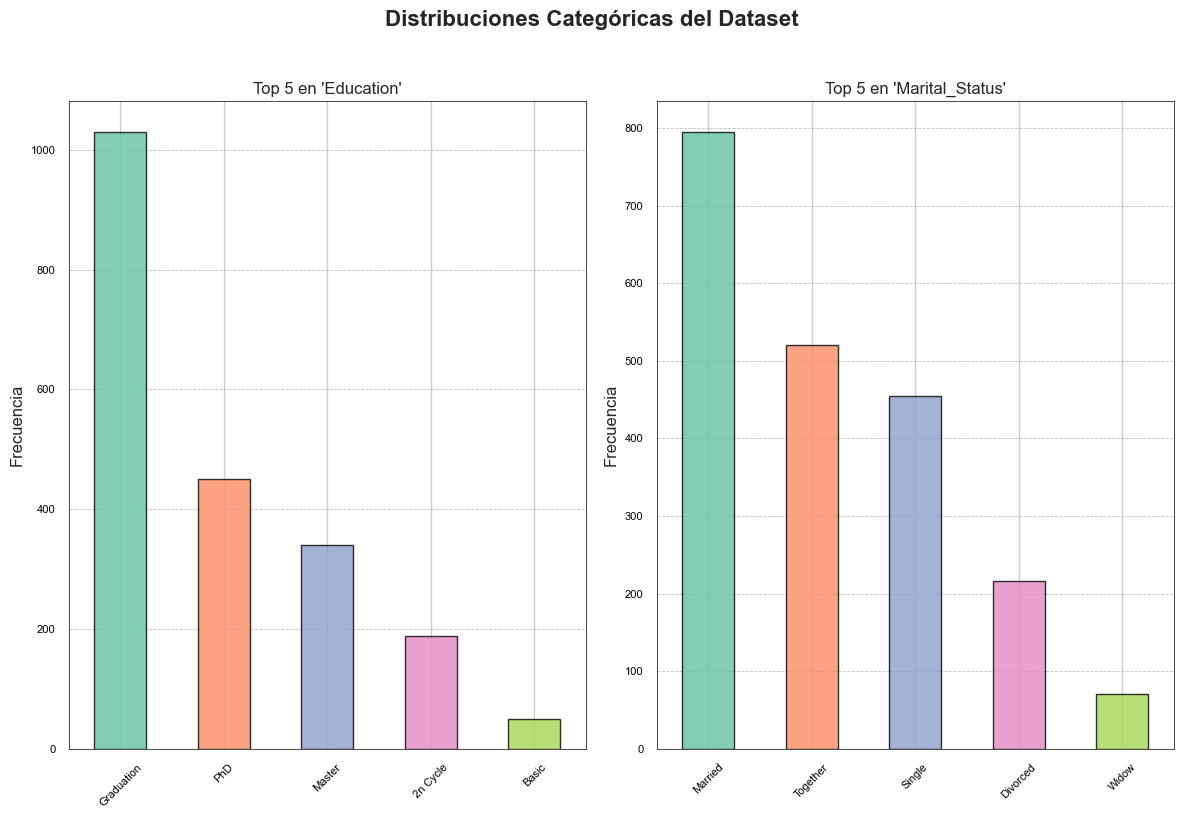

In [101]:
categorical_plot = utils.plot_categorical_distributions(
    data,               # DataFrame con los datos a graficar
    figsize=(12, 8),    # Tamaño de la figura (ancho x alto)
    nrows=1,            # Número de filas en la cuadrícula de subplots
    ncols=2,             # Número de columnas en la cuadrícula de subplots
    color=None,          # Deja color en None para usar la paleta
    palette="Set2",      # Paleta Set2 para barras
    edgecolor="black",   # Color del borde de las barras
    top_n=5,             # Mostrar las 7 categorías más frecuentes
    title="Distribuciones Categóricas del Dataset"  # Título de la figura
)

Existenten mas graduados que phd y masters, esto tiene sentido porque el nivel del dificultad o acceso a carreras de niveles mas altos es mas costoso, tambien se observan que hay mas casados que solteros.

**Analisis de distribución de las variables categoricas por "Response"**

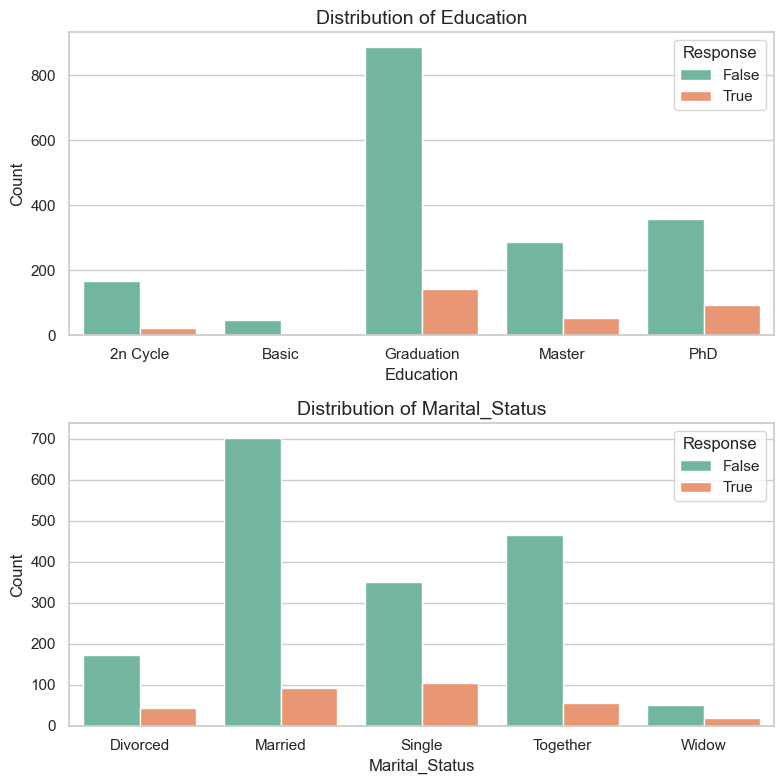

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_theme(style="whitegrid", palette="Set2")


# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, len(categorical_columns) * 4))

# Crear un gráfico por columna categórica
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=data, x=col, ax=ax, hue='Response')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

Las personas graduadas y tambien las casadas son mas propensos a comprar.

**Columnas numericas**

In [103]:
# Valores unicos mediante for
for col in numerical_columns:
    print(f"Columna: {col}")
    print(f"Valores unicos: {data[col].unique()}")
    print()

Columna: Income
Valores unicos: [58138. 46344. 71613. ... 56981. 69245. 52869.]

Columna: Kidhome
Valores unicos: [0 1 2]

Columna: Teenhome
Valores unicos: [0 1 2]

Columna: Recency
Valores unicos: [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

Columna: MntWines
Valores unicos: [ 635   11  426  173  520  235   76   14   28    5    6  194  233    3
 1006   53   84 1012    4   86    1  867  384  270   36  684    8  112
  110   96  482   40  702   55  437  421   13    9   81  123   48  826
  245  650   12  510  328  984  295  447  712  452  523  546  398   10
  688  247  856  496   25  258  565    2  721 1032  577   64  163   17
  130  292  350  135  230    7  445   15   27  505   51  207   41  386
  562  217  144  454  425 1332  52

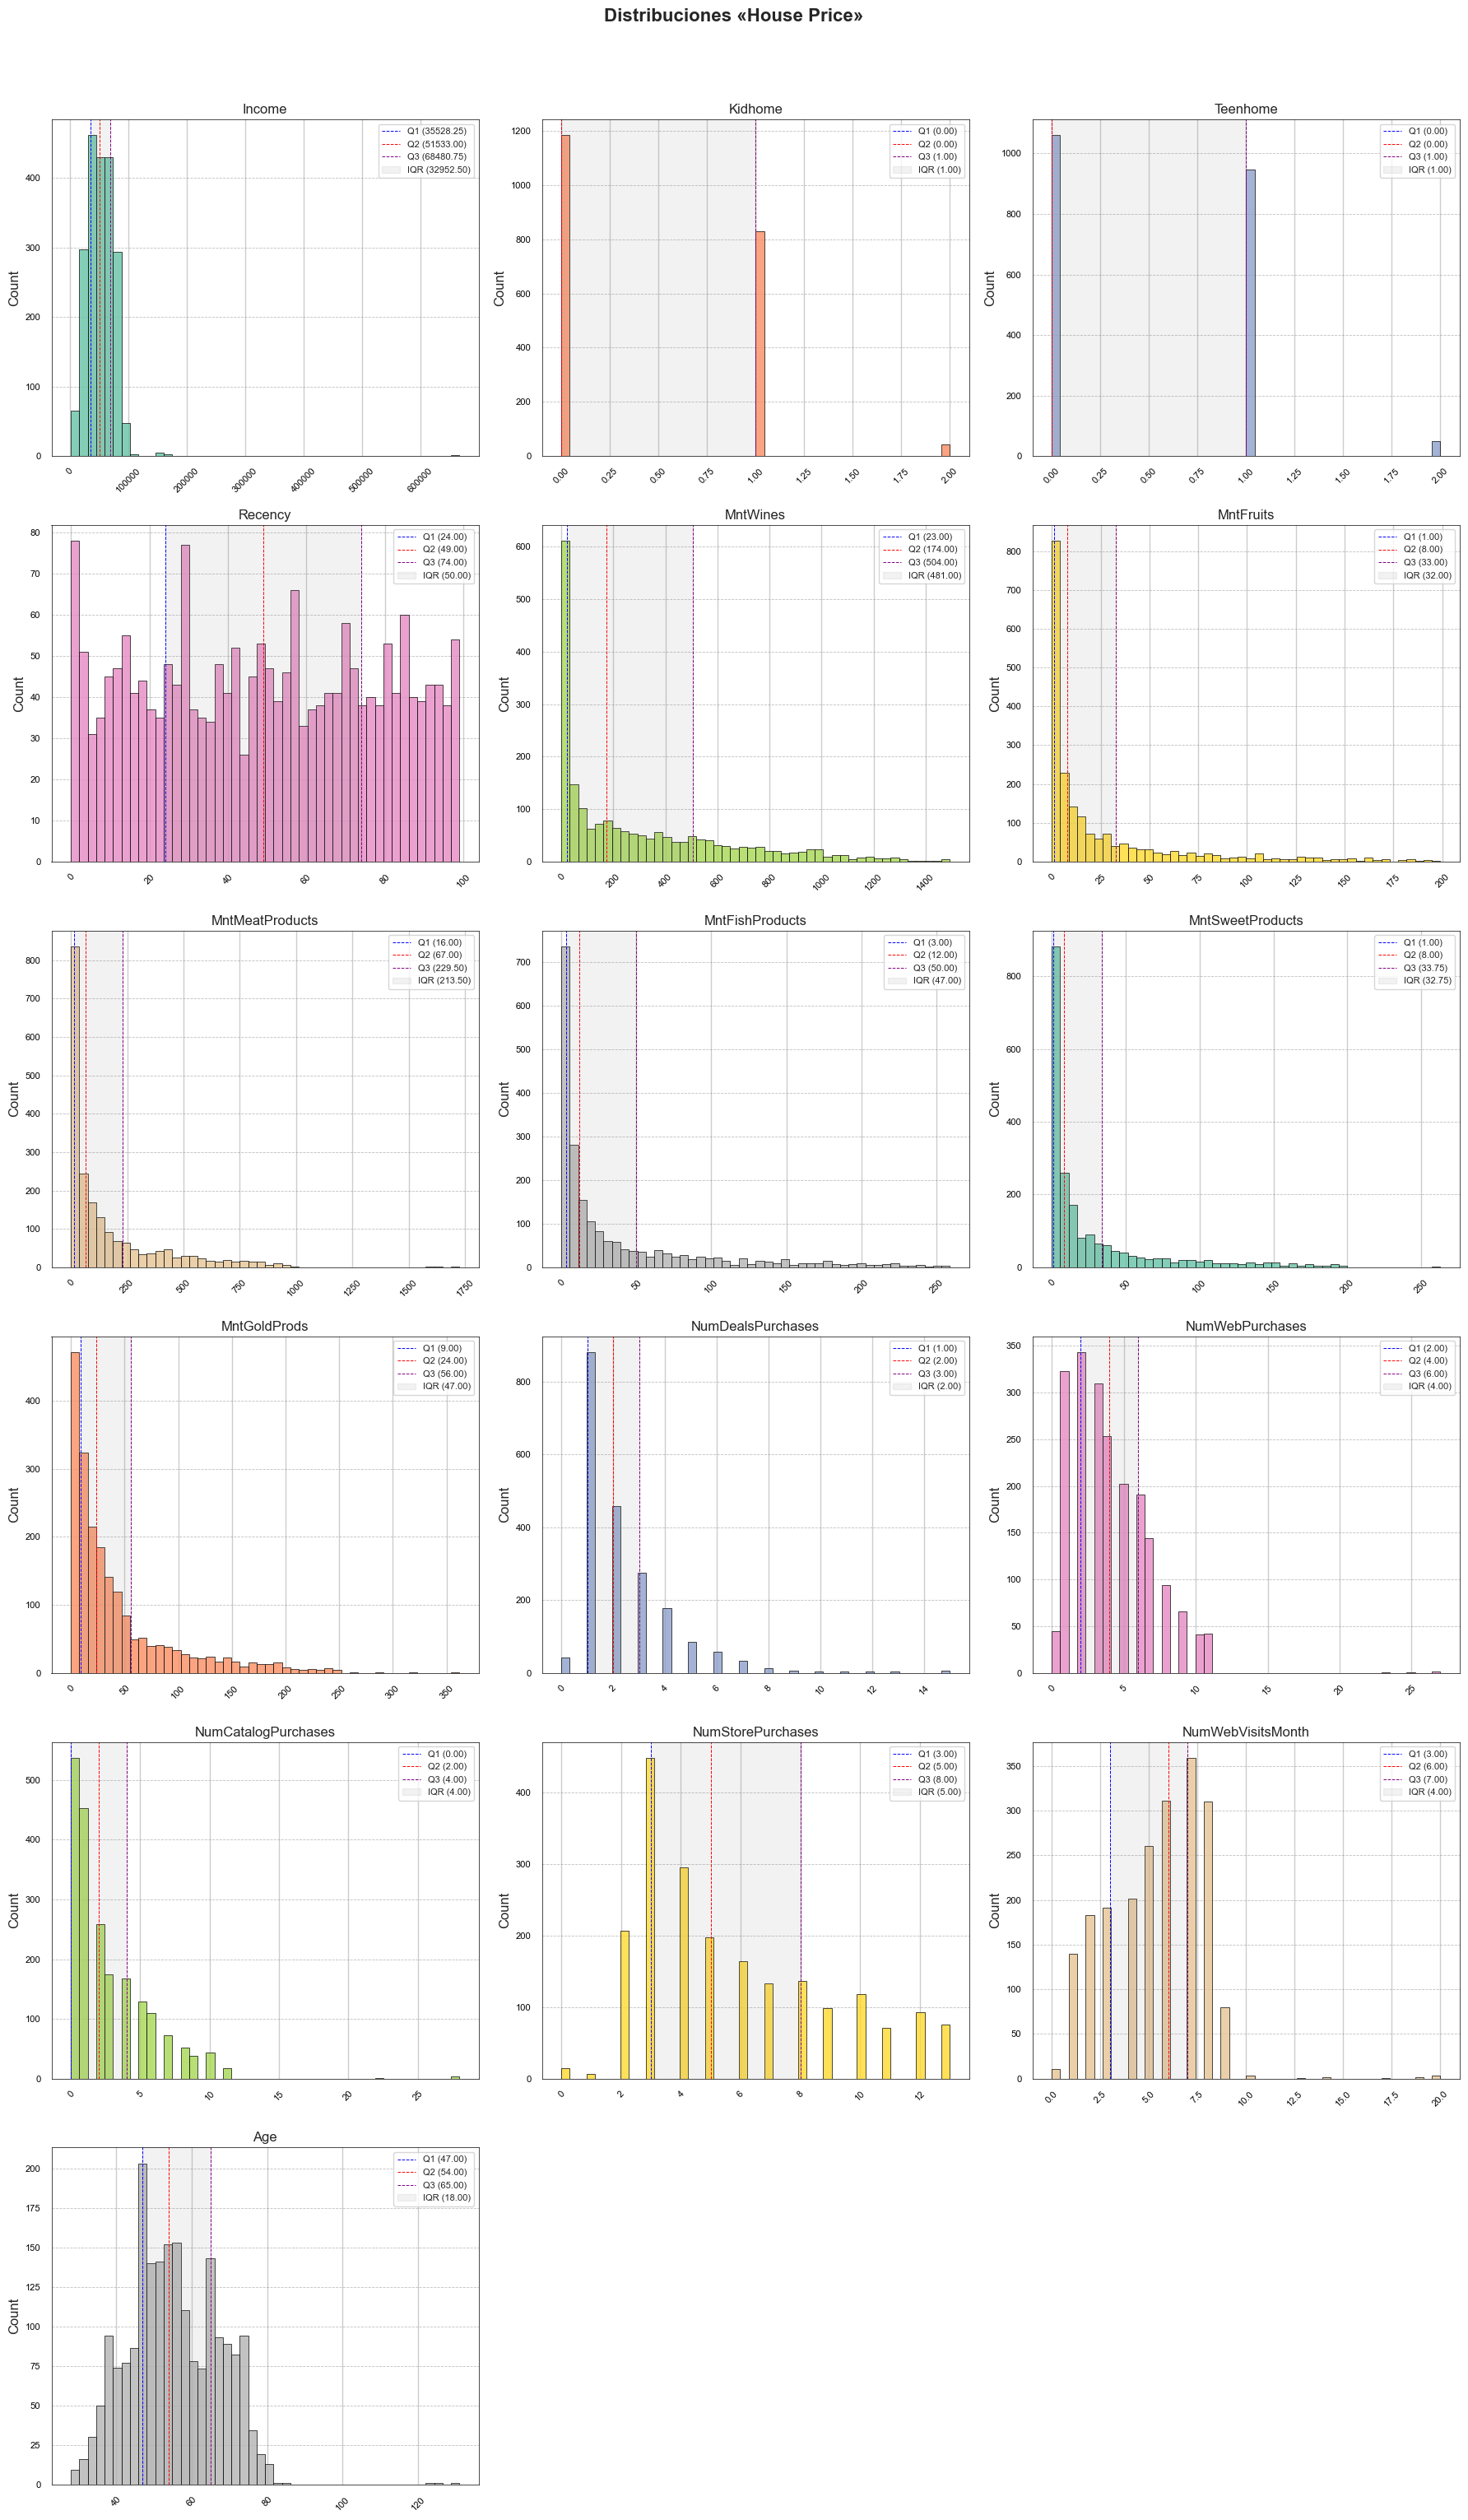

In [104]:
distributionplot = utils.plot_distributions2(
    data,  # DataFrame con los datos a graficar
    figsize=(18, 30),  # Tamaño de la figura (ancho x alto)
    nrows=6,  # Número de filas en la cuadrícula de subplots
    ncols=3,  # Número de columnas en la cuadrícula de subplots
    bins='sqrt',  # Método de cálculo de bins ('rice', 'sqrt', 'sturges', etc.)
    color_palette='Set2',  # Paleta de colores de Seaborn
    show_iqr_and_legend=True,  # Mostrar rangos IQR y leyenda
    kde=False,
    title='Distribuciones «House Price»'  # Título de la figura
)


**Income:** La mayoría de las personas tienen ingresos bajos a medios, con una distribución sesgada hacia los valores más bajos. Un grupo reducido tiene ingresos significativamente más altos, indicando desigualdad en la distribución.

**Kidhome y Teenhome:** Reflejan la composición familiar. La mayoría de los hogares no tienen hijos pequeños ni adolescentes, y muy pocos tienen más de uno, sugiriendo hogares predominantemente sin niños o con una sola generación.

**Recency:** Representa los días desde la última interacción con los clientes. La distribución es bastante uniforme, lo que podría indicar una estrategia de marketing constante sin un periodo específico de actividad.

**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:** Estas variables reflejan el gasto en distintas categorías de productos. Predominan los consumidores con gastos bajos, mientras que unos pocos gastan significativamente más. Esto sugiere que la mayoría de los clientes son moderados en sus compras, pero hay un segmento pequeño de alto gasto.

**NumDealsPurchases:** La mayoría de los consumidores aprovechan pocas promociones, lo que podría reflejar poca dependencia de estrategias promocionales en su comportamiento de compra.

**NumCatalogPurchases:** Pocas personas hacen compras por catálogo, indicando que este canal no es el principal.

**NumStorePurchases:** Las compras en tienda física están concentradas en un rango bajo, aunque hay más variabilidad comparada con otros canales.

**NumWebPurchases:** Las compras por internet son moderadas, con una tendencia similar a las compras en tienda.

**NumWebVisitsMonth:** La mayoría de las personas visitan la página web con poca frecuencia, lo que podría reflejar oportunidades para mejorar la interacción digital.

**Age:** La distribución de edades sigue un patrón normal, con la mayoría de los clientes entre 30 y 40 años, lo que representa una población en etapa económicamente activa.

#### **Verificacion de NaN**

In [105]:
utils.calculate_na_statistics(data)

,datos sin NAs en q,Na en q,Na en %
Income,2034,24,1.17
Education,2058,0,0.00
Marital_Status,2058,0,0.00
Kidhome,2058,0,0.00
Teenhome,2058,0,0.00
Dt_Customer,2058,0,0.00
Recency,2058,0,0.00
MntWines,2058,0,0.00
MntFruits,2058,0,0.00
MntMeatProducts,2058,0,0.00


Existe una sola columna con valores en NaN o nulos, analizaremos esa columna si es conveniente imputarlo o eliminarlo

In [106]:
# Filtar filas con NaN en Income
data_income_nan = data[data['Income'].isna()]
data_income_nan

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
10,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,False,False,False,False,False,False,False,41
27,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,False,False,False,False,False,False,False,38
43,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,False,False,False,False,False,False,False,65
48,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,False,False,False,False,False,False,False,73
58,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,False,False,False,False,False,False,False,42
71,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,False,False,False,False,False,False,False,51
90,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,False,False,False,False,False,False,False,67
91,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,False,False,False,False,False,False,False,67
92,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,False,False,False,False,False,False,False,51
128,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,False,False,False,False,False,False,False,63


Dado que existen pocos valores nulos en Income, podemos probar un modelo de regresion para imputarlos, vamos a entrenar con las filas en donde no sean 0

Convertimos los NaN en 0

In [107]:
# convertir valores nan en 0 de la columna income
data['Income'] = data['Income'].fillna(0)

Creamos un modelo que sea capaz entrenar con las filas en donde los valores no sean 0 y pueda imputar los valores 0 de la columna Income

In [108]:
# Importar librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression

# Paso 1: Seleccionar solo las columnas numéricas (excluyendo 'Income' como target)
X_train = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Income'])
y_train = data['Income']

# Identificar las filas con valores 0 en 'Income'
X_missing = data[data['Income'] == 0].select_dtypes(include=['float64', 'int64']).drop(columns=['Income'])

# Verificar si hay filas con valores 0 en 'Income'
if X_missing.shape[0] > 0:
    # Paso 2: Entrenar el modelo de regresión
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Paso 3: Predecir los valores faltantes en 'Income' (donde originalmente es 0)
    predicted_income = model.predict(X_missing)

    # Paso 4: Crear una copia de 'data' para evitar modificar el original y imputar los valores de 'Income' en el DataFrame
    data_imputed = data.copy()
    data_imputed.loc[data_imputed['Income'] == 0, 'Income'] = predicted_income

# Verificar los resultados
print(data_imputed.head())


    Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  2012-09-04       58   
1  Graduation         Single  46344.0        1         1  2014-03-08       38   
2  Graduation       Together  71613.0        0         0  2013-08-21       26   
3  Graduation       Together  26646.0        1         0  2014-02-10       26   
4         PhD        Married  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPu

Verificamos la imputacion

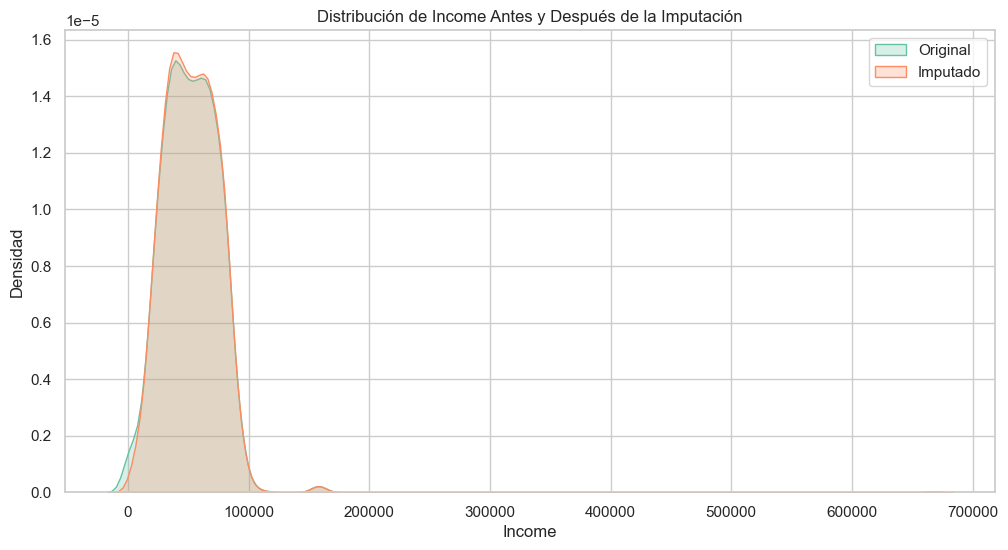

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar la distribución de 'MntFruits' antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.kdeplot(data['Income'], label='Original', fill=True)
sns.kdeplot(data_imputed['Income'], label='Imputado', fill=True)
plt.title('Distribución de Income Antes y Después de la Imputación')
plt.xlabel('Income')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Podemos ver que no cambiamos en nada los valores originales, y solo trabajamos por las columnas 0, tambien se aprecia que esas columnas fueron a parar a un nivel entre la mediana y el promedio.

#### **Analisis de Outliers**

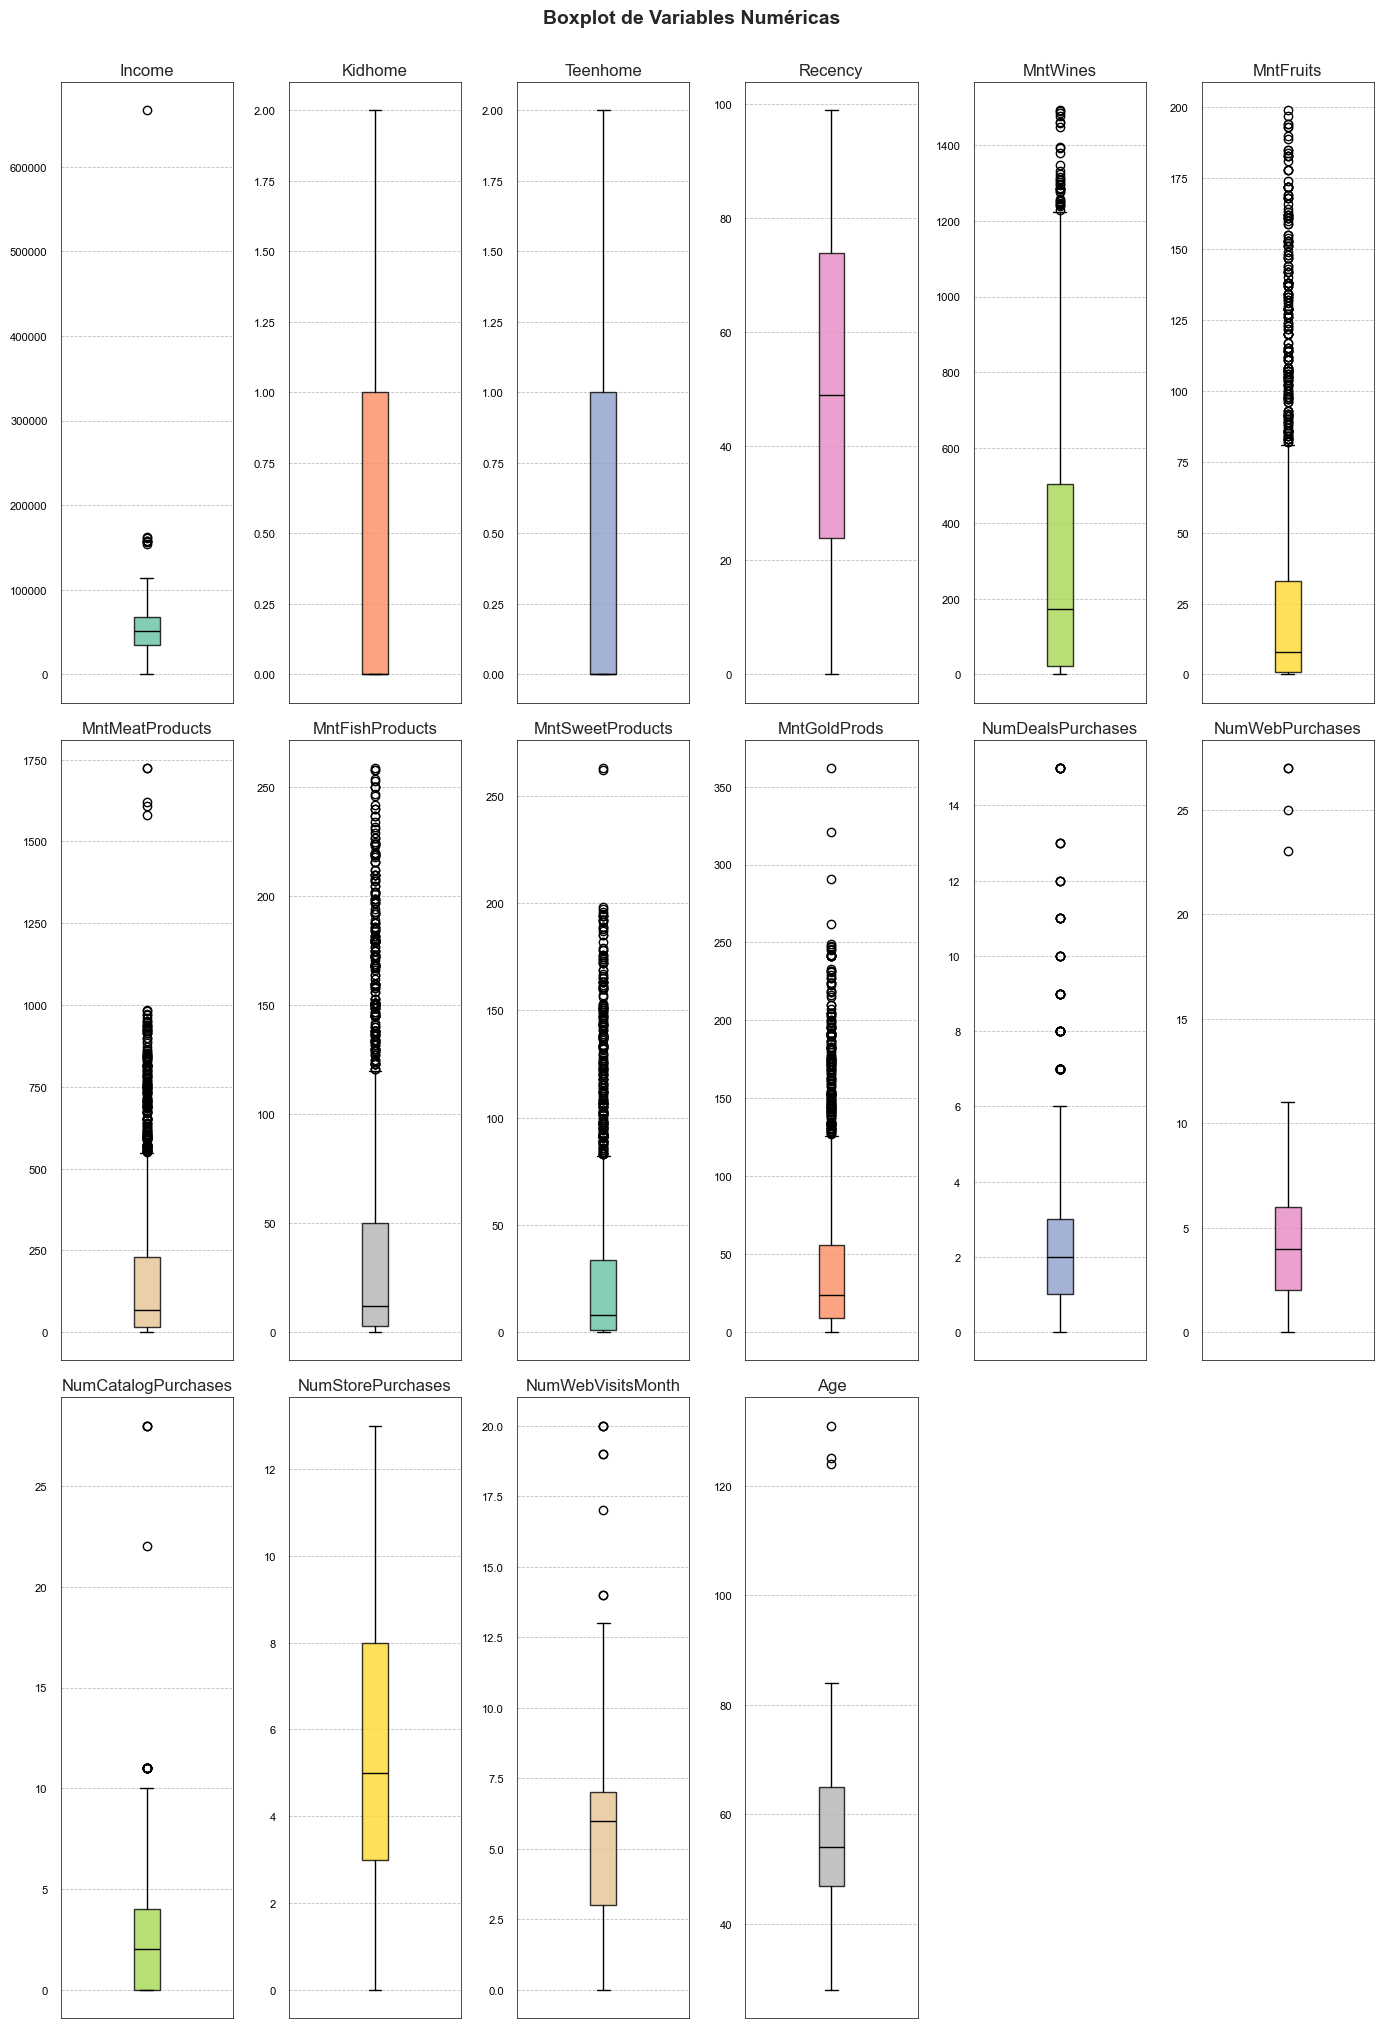

In [110]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
boxplots = utils.plot_boxplots(numeric_df,  # Ahora pasa solo las columnas numéricas
                         nrows=6,  
                         ncols=6,  
                         figsize=(14, 40),  
                         color_palette='Set2',  
                         grid=True,  
                         title='Boxplot de Variables Numéricas',  
                         median_color='black',  
                         box_alpha=0.8)  
plt.show()

Se observan muchos valores outliers, esto puede deberse a errores a la hora de ingresar los datos, tambien se maneja la hipotesis de que las personas tienen productos a los que van a comprar mas.

In [111]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numeric_df:
    outliers = utils.detect_outliers_iqr(numeric_df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': numeric_df[column][~outliers].min(),
        'Upper Bound': numeric_df[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Income,8.0,0.388727,0.0,113734.0
Kidhome,0.0,0.000000,0.0,2.0
Teenhome,0.0,0.000000,0.0,2.0
Recency,0.0,0.000000,0.0,99.0
MntWines,33.0,1.603499,0.0,1224.0
MntFruits,207.0,10.058309,0.0,81.0
MntMeatProducts,174.0,8.454810,0.0,549.0
MntFishProducts,203.0,9.863946,0.0,120.0
MntSweetProducts,225.0,10.932945,0.0,82.0
MntGoldProds,187.0,9.086492,0.0,126.0


Dado que existen outliers en todas las columnas, analizaremos los mas significativos, tales como ***Age y Income***

**Income**

Filtramos las filas en donde Income sea mayor a 180000

In [112]:
# visualizamos las filas con valores mayores a 180000 en la columna 'Income'
outliers_income = numeric_df['Income'] > 180000
data[outliers_income]	# Filtrar filas con valores atípicos


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2233,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,False,False,False,False,False,False,False,47


Existe un solo valor con un Income de 666666, esto seria un error, como es un solo dato, podemos imputarlo por la mediana porque es un estadistico representativo

In [113]:
# Reemplazar los valores mayores a 180000 de la columna 'Income' por la mediana
income_median = data['Income'].median()
data['Income'] = np.where(data['Income'] > 180000, income_median, data['Income'])

**Age**

Filtramos las filas en donde Age sea mayor a 100

In [114]:
outliers_age = numeric_df['Age'] > 100
data[outliers_age]	# Filtrar filas con valores atípicos


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,False,False,False,False,False,True,False,124
239,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,False,False,False,False,False,False,False,131
339,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,False,False,True,False,False,False,False,125


Los resultados arrojan 3 valores atipicos en la columna Age, lo ideal seria imputarlos por la mediana ya que no queremos perder datos y porque es un estadistico representativo de la columna Age.

In [115]:
# Reemplazar los valores mayores a 100 de la columna 'Age' por la mediana
median_age = data['Age'].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x > 100 else x)

Volvemos a verificar con el grafico de boxplots si ambas columnas fueron reemplazadas correctamente

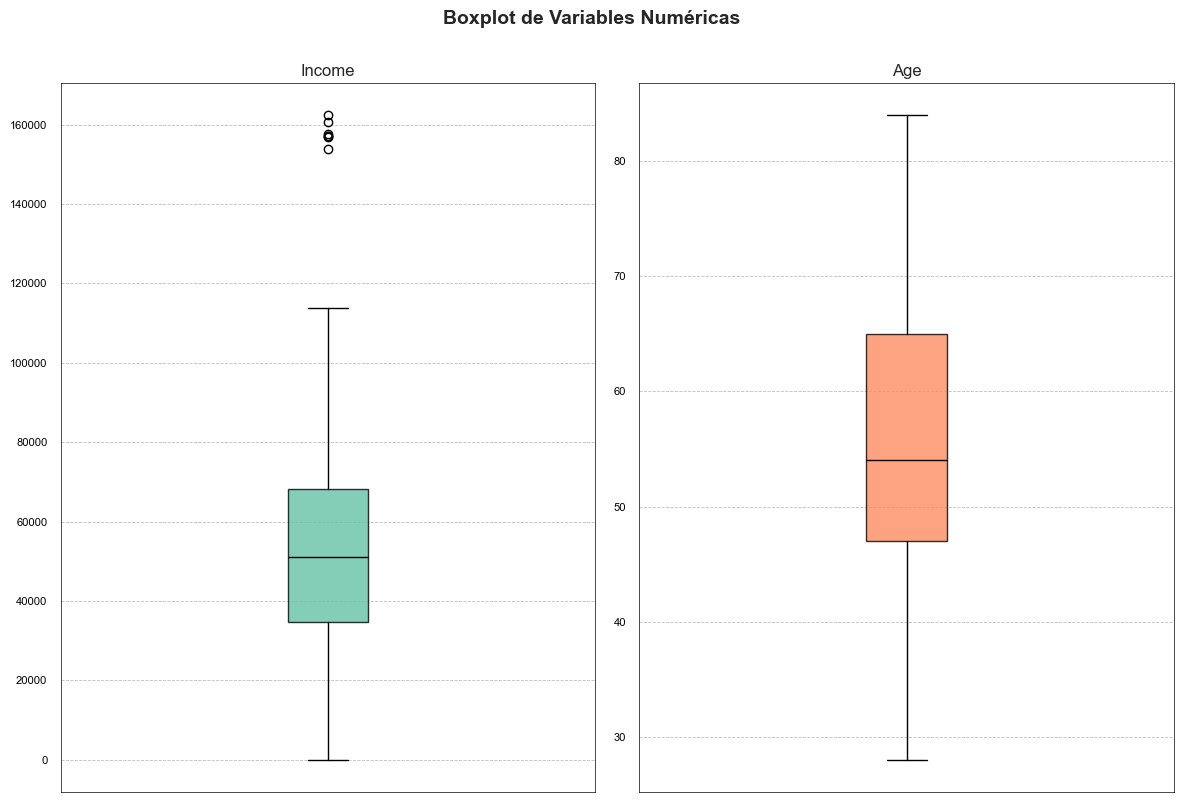

In [116]:
numeric_df = data[['Income', 'Age']]
boxplots = utils.plot_boxplots(numeric_df,  # Ahora pasa solo las columnas numéricas
                         nrows=1,  
                         ncols=2,  
                         figsize=(12, 8),  
                         color_palette='Set2',  
                         grid=True,  
                         title='Boxplot de Variables Numéricas',  
                         median_color='black',  
                         box_alpha=0.8)  
plt.show()

Las columnas Age y Income fueron corregidas, los valores atipicos fueron imputados por la mediana porque ambos son estadisticos representativos de los datos

#### **Estadisticas descriptivas**

In [117]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_columns:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Income,2058.0,51448.16,51208.75,22174.79,0.0,162397.0,34827.5,68146.50
Kidhome,2058.0,0.45,0.00,0.54,0.0,2.0,0.0,1.00
Teenhome,2058.0,0.51,0.00,0.55,0.0,2.0,0.0,1.00
Recency,2058.0,48.95,49.00,29.00,0.0,99.0,24.0,74.00
MntWines,2058.0,303.92,174.00,336.53,0.0,1493.0,23.0,504.00
MntFruits,2058.0,26.23,8.00,39.75,0.0,199.0,1.0,33.00
MntMeatProducts,2058.0,167.70,67.00,228.30,0.0,1725.0,16.0,229.50
MntFishProducts,2058.0,37.33,12.00,54.66,0.0,259.0,3.0,50.00
MntSweetProducts,2058.0,27.18,8.00,41.71,0.0,263.0,1.0,33.75
MntGoldProds,2058.0,43.87,24.00,52.13,0.0,362.0,9.0,56.00


* **Ingresos (Income):**

**La media y mediana** están muy cercanas (51,448.16 y 51,208.75), indicando una distribución relativamente simétrica. Sin embargo, el valor mínimo de 0.0 sugiere la presencia de datos atípicos (outliers), posiblemente individuos sin ingresos reportados.

**La desviación estándar alta** (22,174.79) indica una amplia dispersión, lo que es consistente con el rango considerable de ingresos (0.0 a 162,397.0).

* **Número de hijos en casa (Kidhome, Teenhome):**

**La mediana** para ambas variables es 0.0, lo que sugiere que más del 50% de las observaciones no tienen hijos o adolescentes en casa.

**La desviación estándar es baja** (~0.54 y ~0.55), mostrando que la mayoría de las observaciones están cercanas a los valores más frecuentes (0 o 1).

* **Recency (Días desde la última compra):**

**Distribución uniforme** entre los valores mínimo (0.0) y máximo (99.0), con una media de 48.95 y percentiles distribuidos en cuartiles casi equidistantes.

**La mediana y la media** son similares, sugiriendo una distribución bastante simétrica.

* **Gastos en Productos (MntWines, MntFruits, MntMeatProducts, etc.):**

Los datos muestran una alta dispersión en gastos, con **desviaciones estándar significativas** en productos como vinos (336.53) y carne (228.30).

Los valores **mínimos** de 0.0 indican que algunos clientes no compran ciertos productos, lo cual puede reflejar segmentación en el consumo.

En cada categoría, el **percentil 75** indica que una minoría significativa gasta más que la media, mostrando una distribución sesgada a la derecha.

* **Frecuencia de Compras (NumDealsPurchases, NumWebPurchases, etc.):**

La mayoría de las variables de frecuencia tienen **medias y medianas** cercanas, indicando distribuciones relativamente equilibradas.

La mayor variación se observa en las compras en tienda (NumStorePurchases) y en catálogos (NumCatalogPurchases), lo que puede reflejar diferencias en los patrones de compra entre los consumidores.

* **Edad (Age):**

La **media** (55.11 años) y la **mediana** (54 años) indican una población adulta mayormente madura.

El rango entre el **mínimo** (28 años) y el **máximo** (84 años) muestra una dispersión significativa en la edad, aunque la mayoría de las observaciones están concentradas entre los 47 y 65 años (según los percentiles).

### **Verificacion de valores en 0**

**Columna Recency**

In [118]:
# Filtrar datos en donde recency sea 0
data_recency_0 = data[data['Recency'] == 0]
data_recency_0.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
23,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,False,False,False,False,False,False,False,70.0
66,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,False,False,False,False,False,False,False,57.0
100,2n Cycle,Single,47823.0,0,1,2013-07-23,0,53,1,5,2,1,10,2,2,0,3,8,False,False,False,False,False,False,False,64.0
160,Master,Single,30523.0,2,1,2013-07-01,0,5,0,3,0,0,5,1,1,0,2,7,False,False,False,False,False,False,False,66.0
347,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,False,False,False,False,False,False,True,54.0


Para la columna Recency, indica cuantos dias paso desde la ultima vez que compro, esto puede ser que los valores 0 sean correctos, pueden indicar que las personas hicieron compras y en el mismo dia volvieron a hacer compras porque se olvidaron de algo. Por ende dejamos como esta

**Columna MntFruits**

In [119]:
# Filtrar datos en donde recency sea 0
data_MntFruits = data[data['MntFruits'] == 0]
data_MntFruits.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
8,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,False,False,False,False,False,False,True,50.0
9,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,True,False,False,False,False,False,False,74.0
22,PhD,Married,58607.0,0,1,2012-12-23,63,867,0,86,0,0,19,3,2,3,9,8,False,True,False,False,False,False,False,75.0
23,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,False,False,False,False,False,False,False,70.0
32,Graduation,Together,40548.0,0,1,2012-10-10,31,110,0,5,2,0,3,2,2,1,4,5,False,True,False,False,False,False,False,54.0


Para la columna MntFruits existen muchos valores en 0, esto es raro, porque la columna indica que en los ultimos dos años no compro fruta, no conozco personas que esten bien de salud sin comer fruta, tambien podria ser que el super no venda frutas de buena calidad y prefieran comprar de otro sitio.

Probaremos imputar los valores en 0 por la mediana.

In [120]:
# Reemplazar ceros por NaN temporalmente para imputar
data_imputed = data.copy()
data_imputed['MntFruitsImputed'] = data['MntFruits'].replace(0, np.nan)

# Calcular la mediana de la columna 'MntFruits' sin incluir los NaN ni ceros
median_MntFruits = data_imputed['MntFruitsImputed'].median()

# Imputar valores faltantes (NaN) con la mediana
data_imputed['MntFruitsImputed'] = data_imputed['MntFruitsImputed'].fillna(median_MntFruits)

# Verificar el resultado
print(data_imputed[['MntFruits', 'MntFruitsImputed']].head())


   MntFruits  MntFruitsImputed
0         88              88.0
1          1               1.0
2         49              49.0
3          4               4.0
4         43              43.0


In [121]:
data_imputed.MntFruitsImputed.describe()

count    2058.000000
mean       28.559281
std        38.508693
min         1.000000
25%         5.000000
50%        13.000000
75%        33.000000
max       199.000000
Name: MntFruitsImputed, dtype: float64

In [122]:
data.MntFruits.describe()

count    2058.000000
mean       26.234694
std        39.750728
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

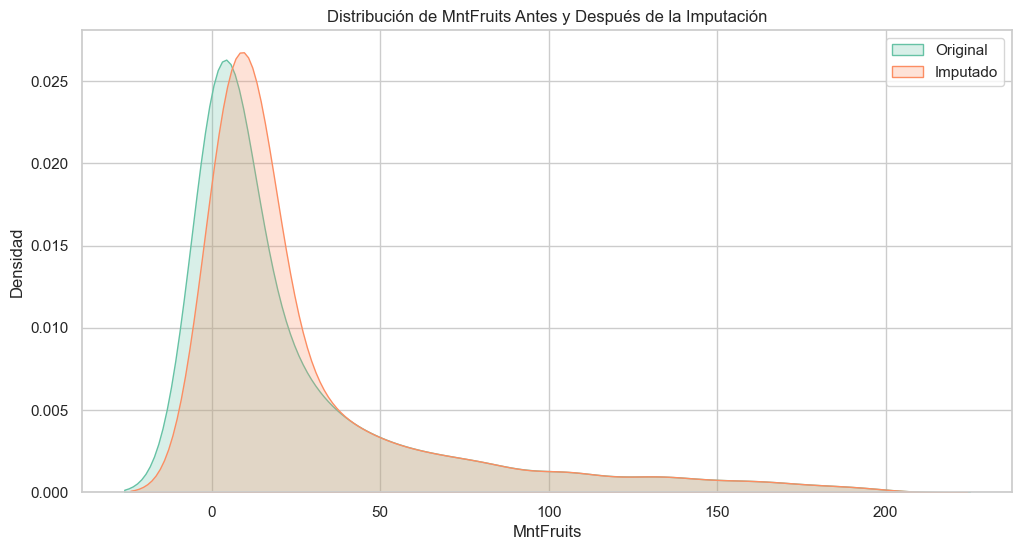

In [123]:
# Comparar la distribución de 'MntFruits' antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.kdeplot(data['MntFruits'], label='Original', fill=True)
sns.kdeplot(data_imputed['MntFruitsImputed'], label='Imputado', fill=True)
plt.title('Distribución de MntFruits Antes y Después de la Imputación')
plt.xlabel('MntFruits')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Despues de imputar los valores en 0 por la mediana, podemos observar que los datos no cambiaron mucho.

**Columna MntWines**

In [124]:
# Filtrar datos en donde recency sea 0
data_MntWines = data[data['MntWines'] == 0]
data_MntWines.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
136,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,2,1,0,3,8,False,False,False,False,False,False,False,48.0
233,Graduation,Single,15033.0,0,0,2014-04-16,37,0,4,5,6,0,4,1,1,0,3,3,False,False,False,False,False,False,False,73.0
444,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,3,7,6,12,1,1,0,3,8,False,False,False,False,False,False,False,50.0
445,Graduation,Divorced,23295.0,0,0,2013-07-13,72,0,0,1,2,12,5,1,1,0,2,8,False,False,False,False,False,False,False,65.0
738,Basic,Married,17487.0,1,0,2013-03-18,37,0,0,1,7,4,6,1,1,0,2,7,False,False,False,False,False,False,False,35.0


Como Wine son bebidas alcoholicas y hay pocos valores con 0, procedemos a dejarlas como esta, la razon es porque hay personas que no consumen alcohol, y no tiene sentido agregarles un valor a ellos.

**Columna MntMeatProducts**

In [125]:
# Filtrar datos en donde recency sea 0
data_MntMeatProducts = data[data['MntMeatProducts'] == 0]
data_MntMeatProducts

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
1861,2n Cycle,Divorced,11448.0,0,0,2013-12-15,16,0,0,0,6,2,6,1,1,0,2,6,False,False,False,False,False,False,False,49.0


In [126]:
# Reemplazar ceros por NaN temporalmente para imputar
data_imputed['MntMeatProductsImputed'] = data['MntMeatProducts'].replace(0, np.nan)

# Calcular la mediana de la columna 'MntFruits' sin incluir los NaN ni ceros
median_MntMeatProducts = data_imputed['MntMeatProductsImputed'].median()

# Imputar valores faltantes (NaN) con la mediana
data_imputed['MntMeatProductsImputed'] = data_imputed['MntMeatProductsImputed'].fillna(median_MntFruits)

# Verificar el resultado
print(data_imputed[['MntMeatProducts', 'MntMeatProductsImputed']].head())

   MntMeatProducts  MntMeatProductsImputed
0              546                   546.0
1                6                     6.0
2              127                   127.0
3               20                    20.0
4              118                   118.0


Despues de verificar que existe un solo dato con 0 en MntMeatProduct procedemos a imputarlo por la mediana, es dificil decir que sea una persona vegetariana porque en sus compras vemos que ha realizado compras de fish

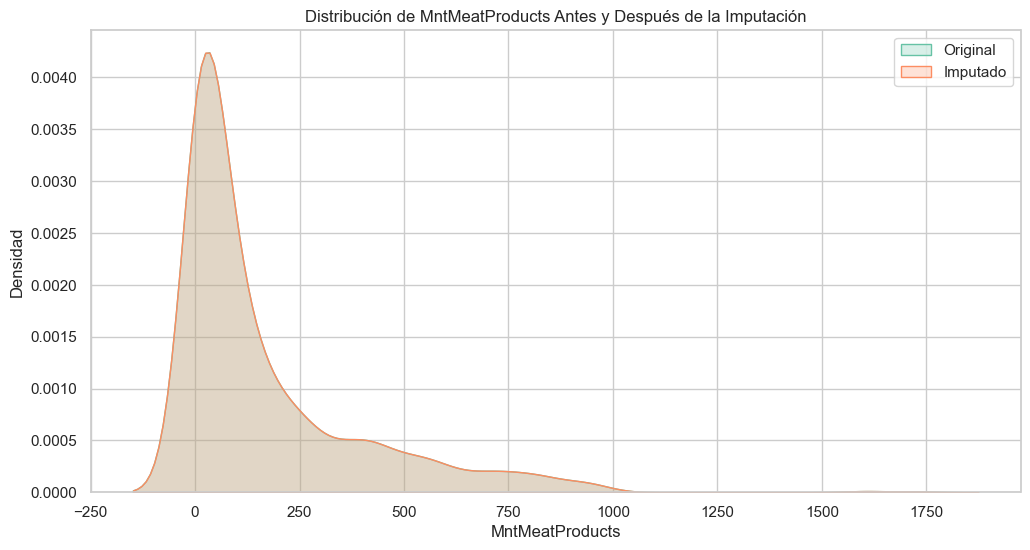

In [127]:
# Comparar la distribución de 'MntFruits' antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.kdeplot(data['MntMeatProducts'], label='Original', fill=True)
sns.kdeplot(data_imputed['MntMeatProductsImputed'], label='Imputado', fill=True)
plt.title('Distribución de MntMeatProducts Antes y Después de la Imputación')
plt.xlabel('MntMeatProducts')
plt.ylabel('Densidad')
plt.legend()
plt.show()


**Columna MntFishProducts**

In [128]:
# Filtrar datos en donde recency sea 0
data_MntFishProducts = data[data['MntFishProducts'] == 0]
data_MntFishProducts

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
5,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,False,False,False,False,False,False,False,57.0
10,Graduation,Married,0.0,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,False,False,False,False,False,False,False,41.0
18,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,False,False,False,True,False,False,False,75.0
22,PhD,Married,58607.0,0,1,2012-12-23,63,867,0,86,0,0,19,3,2,3,9,8,False,True,False,False,False,False,False,75.0
36,PhD,Married,67353.0,0,1,2013-12-31,37,702,17,151,0,8,35,5,5,6,12,2,False,False,False,False,False,False,False,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,Graduation,Single,35893.0,1,1,2012-10-15,80,158,0,23,0,0,18,6,3,1,5,8,False,False,False,False,False,False,False,56.0
2207,Graduation,Together,32144.0,1,1,2014-03-23,76,41,0,10,0,0,3,4,2,1,3,7,False,True,False,False,False,False,False,70.0
2209,Graduation,Divorced,45146.0,1,1,2013-07-15,28,33,0,5,0,0,15,2,1,1,2,4,False,False,False,False,False,False,False,61.0
2215,Graduation,Together,36807.0,1,1,2012-12-20,88,4,2,5,0,0,5,1,1,0,2,6,False,False,False,False,False,False,False,70.0


El tema de los pescados es complicado, hay muchos valores en 0, puede ser que las personas no les gusten, tambien puede ser que no consigan pescado fresco y por ende no compren, en ese caso dejaremos como esta.

**Columna MntSweetProducts**

In [129]:
# Filtrar datos en donde recency sea 0
data_MntSweetProducts = data[data['MntSweetProducts'] == 0]
data_MntSweetProducts

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
22,PhD,Married,58607.0,0,1,2012-12-23,63,867,0,86,0,0,19,3,2,3,9,8,False,True,False,False,False,False,False,75.0
32,Graduation,Together,40548.0,0,1,2012-10-10,31,110,0,5,2,0,3,2,2,1,4,5,False,True,False,False,False,False,False,54.0
38,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,0,6,2,0,4,2,1,1,3,5,False,False,False,False,False,False,False,51.0
41,Master,Married,20559.0,1,0,2013-03-12,88,13,1,29,3,0,7,2,2,0,3,8,False,False,False,False,False,False,False,39.0
59,PhD,Married,55954.0,0,1,2014-03-03,63,447,0,28,0,0,43,3,8,2,6,7,False,False,False,False,False,False,False,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,29,131,32,0,27,6,8,1,7,8,False,False,False,False,False,False,False,69.0
2215,Graduation,Together,36807.0,1,1,2012-12-20,88,4,2,5,0,0,5,1,1,0,2,6,False,False,False,False,False,False,False,70.0
2224,PhD,Single,57642.0,0,1,2014-01-09,24,580,6,58,8,0,27,3,7,6,6,4,True,False,False,False,False,False,False,54.0
2227,Graduation,Single,57967.0,0,1,2013-03-03,39,229,7,137,4,0,91,5,4,2,8,5,False,False,False,False,False,False,False,62.0


Para los valores en 0 de dulces, dejaremos como esta, existen muchas personas que no pueden comer cosas dulces o bien, no les gustan, por ende no vale la pena modifcar esos datos.

**Columna MntGoldProds**

In [130]:
# Filtrar datos en donde recency sea 0
data_MntGoldProds = data[data['MntGoldProds'] == 0]
data_MntGoldProds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
29,PhD,Married,84618.0,0,0,2013-11-22,96,684,100,801,21,66,0,1,6,9,10,2,False,False,True,False,False,False,False,59.0
66,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,False,False,False,False,False,False,False,57.0
94,PhD,Married,23626.0,1,0,2014-05-24,84,27,2,14,0,0,0,3,3,1,3,5,False,False,False,False,False,False,False,54.0
135,PhD,Together,62981.0,0,0,2013-03-17,21,796,14,590,38,44,0,1,4,5,13,3,False,True,False,False,False,False,False,57.0
157,Graduation,Single,60199.0,1,2,2013-09-12,49,8,1,7,2,0,0,1,0,0,3,4,False,False,False,False,False,False,False,46.0


Para las columnas MntGold podemos dejarlo como esta, las personas no suelen comprar oro todo el tiempo, es una inversion que no muchos se pueden dar el lujo de hacerlo, o bien, no les interesa.

### **Clusters**

In [131]:
# Definir el orden explícito para 'Education'
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Crear OrdinalEncoder para 'Education'
ordinal_encoder = OrdinalEncoder(categories=[education_order])
data['Education'] = ordinal_encoder.fit_transform(data[['Education']]).astype(int)

# Crear LabelEncoder para 'Marital_Status'
labelencoder = LabelEncoder()
data['Marital_Status'] = labelencoder.fit_transform(data['Marital_Status'])

# Verificar resultados
data[['Education', 'Marital_Status']].head()



,Education,Marital_Status
0,2,2
1,2,2
2,2,3
3,2,3
4,4,1


In [132]:
# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Función para convertir columnas categóricas
def encode_categorical_columns(df):
    for column in df.select_dtypes(include=['category', 'object']).columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

# Convertir columnas booleanas a dummies
def encode_boolean_columns(df):
    # Seleccionar las columnas booleanas
    bool_columns = df.select_dtypes(include=['bool']).columns
    # Convertir cada columna booleana en 0 y 1
    df[bool_columns] = df[bool_columns].astype(int)
    return df

# Aplicar ambas funciones al DataFrame
data_imputed = encode_categorical_columns(data_imputed)
data_imputed = encode_boolean_columns(data_imputed)

# Verifica los cambios
data_imputed.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntFruitsImputed,MntMeatProductsImputed
0,2,2,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67.0,88.0,546.0
1,2,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70.0,1.0,6.0
2,2,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59.0,49.0,127.0
3,2,3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40.0,4.0,20.0
4,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43.0,43.0,118.0


In [133]:
# eliminar las columnas MntFruitsImputed y MntMeatProductsImputed
data_imputed.drop(['MntFruitsImputed', 'MntMeatProductsImputed'], axis=1, inplace=True)

In [134]:
data_imputed2 = data_imputed.copy()
print(data_imputed2.info())
data_imputed2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2058 non-null   int64         
 1   Marital_Status       2058 non-null   int64         
 2   Income               2058 non-null   float64       
 3   Kidhome              2058 non-null   int64         
 4   Teenhome             2058 non-null   int64         
 5   Dt_Customer          2058 non-null   datetime64[ns]
 6   Recency              2058 non-null   int64         
 7   MntWines             2058 non-null   int64         
 8   MntFruits            2058 non-null   int64         
 9   MntMeatProducts      2058 non-null   int64         
 10  MntFishProducts      2058 non-null   int64         
 11  MntSweetProducts     2058 non-null   int64         
 12  MntGoldProds         2058 non-null   int64         
 13  NumDealsPurchases    2058 non-null   i

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,2,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67.0
1,2,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70.0
2,2,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59.0
3,2,3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40.0
4,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43.0


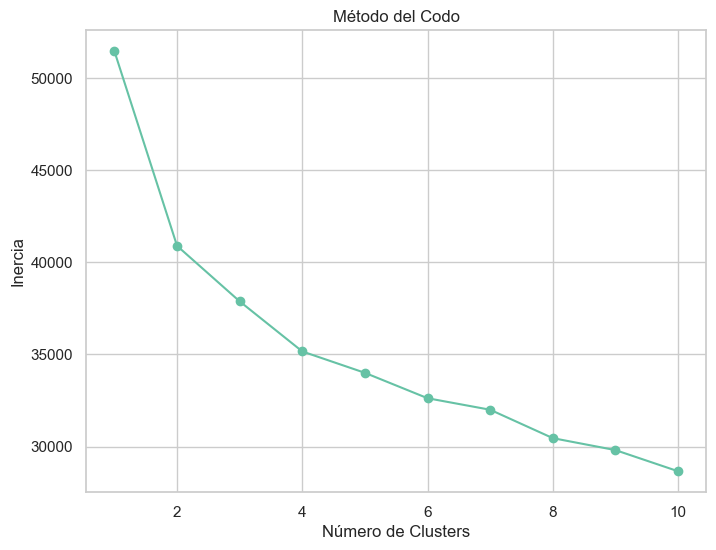

Coeficiente de Silueta: 0.20712176280203548


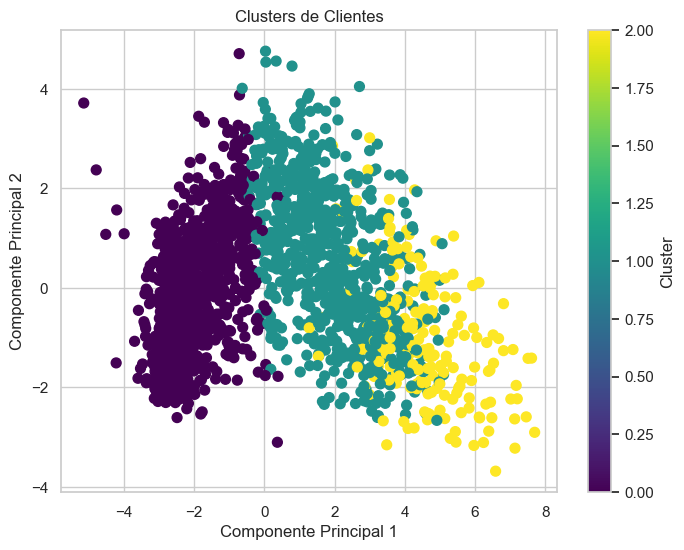

In [135]:
# Selección de columnas relevantes (excluyendo variables no numéricas o irrelevantes)
columns = ['Income', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency', 'Age']
data = data_imputed2[columns]

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Método del codo (Elbow)
inertia = []
range_k = range(1, 11)  # Probar de 1 a 10 clusters
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Elegir el número óptimo de clusters (usualmente donde la disminución de la inercia se estabiliza)
optimal_k = 3  # Esto es un ejemplo, basándote en el gráfico del codo

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_imputed2['Cluster'] = kmeans.fit_predict(data_scaled)

# Evaluar la calidad de los clusters con el coeficiente de silueta
silhouette_avg = silhouette_score(data_scaled, data_imputed2['Cluster'])
print(f"Coeficiente de Silueta: {silhouette_avg}")

# Visualizar los clusters con PCA para reducción de dimensionalidad (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data_imputed2['Cluster'], cmap='viridis', s=50)
plt.title('Clusters de Clientes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


### **MLP**

Calculamos las proporciones de las compras y creamos ratios de probabilidades de compra.

In [136]:
data.loc[:, "Monto_Total"] = data[[
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)

for column in ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]:
    data.loc[:, f"Proporcion_{column}"] = data[column] / data["Monto_Total"]


C:\Users\guill\AppData\Local\Temp\ipykernel_9596\2019891247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Monto_Total"] = data[[


Seleccionamos nuestras variables objetivo y predictivas

, 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'

In [137]:
# Paso 3: Definir variables predictoras y objetivo
X = data[['Income', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency', 'Age']]

# Predecir si realizan compras en 'Proporcion_MntWines'
y = (data["Proporcion_MntWines"] > 0.5).astype(int)  # 1 si la proporción es mayor al 10%

In [138]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Paso 4: Crear el modelo de red neuronal multicapa
model = Sequential()

# Capa de entrada y capas ocultas
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.05)))  # Regularización L2 aumentada
model.add(Dropout(0.3))  # Dropout más bajo
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.05)))  # Segunda capa con regularización L2
model.add(Dropout(0.3))  # Dropout más bajo

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Salida con activación sigmoide para clasificación binaria

# Paso 5: Compilar el modelo con optimizador Adam y ajustar el learning rate
optimizer = Adam(learning_rate=0.0005)  # Tasa de aprendizaje baja para evitar sobreajuste

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



c:\Users\guill\anaconda3\envs\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
# Paso 6: Definir callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # Parar si no mejora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.001)  # Reducir LR si no mejora



In [141]:
# Paso 7: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr])

# Paso 8: Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")

# Predicciones
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluar con precisión y mostrar matriz de confusión
print("Precisión:", accuracy_score(y_test, y_pred))


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4643 - loss: 2.9445 - val_accuracy: 0.5016 - val_loss: 2.6107 - learning_rate: 5.0000e-04
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4919 - loss: 2.5600 - val_accuracy: 0.5599 - val_loss: 2.2945 - learning_rate: 5.0000e-04
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5262 - loss: 2.2535 - val_accuracy: 0.6003 - val_loss: 2.0335 - learning_rate: 5.0000e-04
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5696 - loss: 1.9959 - val_accuracy: 0.6699 - val_loss: 1.8108 - learning_rate: 5.0000e-04
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6085 - loss: 1.7778 - val_accuracy: 0.6764 - val_loss: 1.6206 - learning_rate: 5.0000e-04
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6225 - loss: 1.5914 - val_accuracy: 0.6974 - val_loss: 1.4570 - learning_rate: 5.0000e-04
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6417 - l

In [142]:
# Ahora intenta imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       363
           1       0.71      0.68      0.70       255

    accuracy                           0.75       618
   macro avg       0.75      0.74      0.74       618
weighted avg       0.75      0.75      0.75       618



* **Precisión:** La precisión mide la exactitud de las predicciones positivas, es decir, cuántas de las predicciones del modelo para una clase (en este caso, "Compra" o "No Compra") fueron correctas.

Para la clase "No Compra", la precisión es del 78%, lo que significa que el modelo predijo correctamente "No Compra" el 78% de las veces.
Para la clase "Compra", la precisión es del 71%, lo que indica que el modelo predijo correctamente "Compra" el 71% de las veces.

* **Recall:** El recall (también conocido como sensibilidad o tasa de verdaderos positivos) mide la capacidad del modelo para identificar correctamente todas las instancias de una clase específica.

Para la clase "No Compra", el recall es del 80%, lo que indica que el modelo identificó correctamente el 80% de las instancias de "No Compra".
Para la clase "Compra", el recall es del 68%, lo que significa que el modelo identificó correctamente solo el 68% de las instancias de "Compra". Esto sugiere que el modelo tiene dificultades para identificar todas las "Compras".

* **F1-score:** El F1-score es la media armónica de la precisión y el recall. Proporciona una métrica balanceada que toma en cuenta tanto las falsos positivos como los falsos negativos.

Para "No Compra", el F1-score es del 79%, lo que indica un buen equilibrio entre precisión y recall.
Para "Compra", el F1-score es del 70%, lo que refleja que aunque la precisión es relativamente alta, el modelo tiene un recall bajo, lo que reduce el F1-score.

* **Exactitud (Accuracy):** La exactitud indica el porcentaje total de predicciones correctas sobre el total de predicciones realizadas.

En este caso, el accuracy es del 75%, lo que significa que el modelo acertó el 75% de todas sus predicciones (tanto "Compra" como "No Compra").

* **Promedio Macro:** El promedio macro calcula las métricas (precisión, recall y F1-score) para cada clase individualmente y luego las promedia, sin considerar el desequilibrio entre las clases.

El promedio macro de precisión es 75%, el recall es 74%, y el F1-score es 74%, lo que refleja un desempeño relativamente equilibrado entre las dos clases.
Promedio Ponderado: El promedio ponderado tiene en cuenta el número de instancias de cada clase. Es decir, las clases con más ejemplos tienen un mayor impacto en el promedio.

El promedio ponderado de precisión es 75%, el recall es 75%, y el F1-score es 75%, lo que indica que el modelo tiene un desempeño consistente en general, con las clases más representadas (como "No Compra") influyendo más en estas métricas.

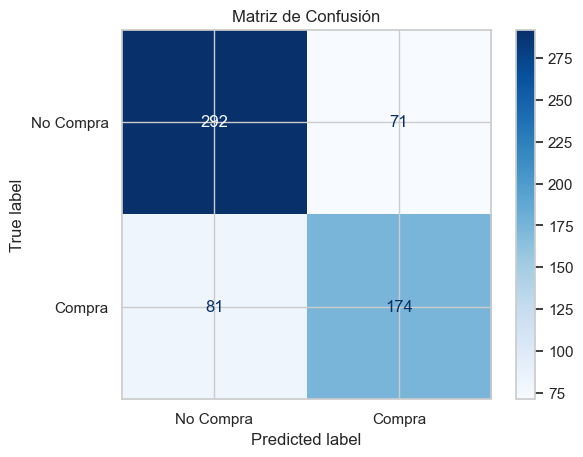

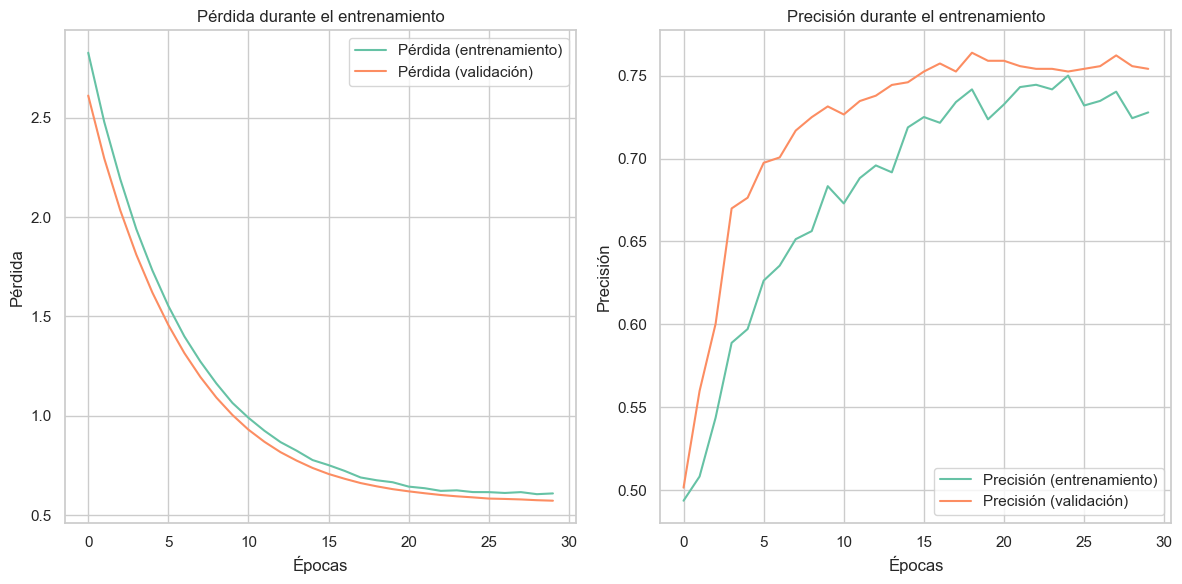

In [143]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Graficar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

El modelo fue capaz de predecir si un cliente realiza compras en la categoría de vinos con una precisión del 75% en el conjunto de prueba. La matriz de confusión muestra que el modelo tuvo 77 falsos negativos y 72 falsos positivos.

### **Random Forest Regresor**

In [144]:
# Paso 1: Calcular el monto total
data["Monto_Total"] = data[
    ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
].sum(axis=1)

# Paso 2: Calcular proporciones
for column in ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]:
    data[f"Proporcion_{column}"] = data[column] / data["Monto_Total"]

# Paso 3: Definir variables predictoras y objetivos
X = data[["Income", "Kidhome", "Teenhome", "Education", "Marital_Status", "Recency", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "NumWebVisitsMonth", "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases", "Complain"]]
y = data[[
    "Proporcion_MntWines", "Proporcion_MntFruits", "Proporcion_MntMeatProducts",
    "Proporcion_MntFishProducts", "Proporcion_MntSweetProducts", "Proporcion_MntGoldProds"
]]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Entrenar un modelo de regresión múltiple
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Paso 5: Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred, multioutput="raw_values")
print("Errores Cuadráticos Medios (MSE) por categoría:", mse)

# Mostrar resultados
resultados = pd.DataFrame(y_pred, columns=y.columns)
print("\nPredicciones de proporciones:\n", resultados)


Errores Cuadráticos Medios (MSE) por categoría: [0.02615252 0.0027349  0.0122687  0.00453567 0.00299992 0.00677121]

Predicciones de proporciones:
      Proporcion_MntWines  Proporcion_MntFruits  Proporcion_MntMeatProducts  \
0               0.597531              0.010495                    0.232769   
1               0.358567              0.067839                    0.355434   
2               0.426583              0.034943                    0.185188   
3               0.569537              0.050305                    0.261034   
4               0.547697              0.032577                    0.273549   
..                   ...                   ...                         ...   
613             0.453872              0.043279                    0.344966   
614             0.211546              0.112571                    0.242752   
615             0.635851              0.020539                    0.191872   
616             0.509705              0.062625                    0.2067

**Prediccion de compra Proporcion_MntWines**

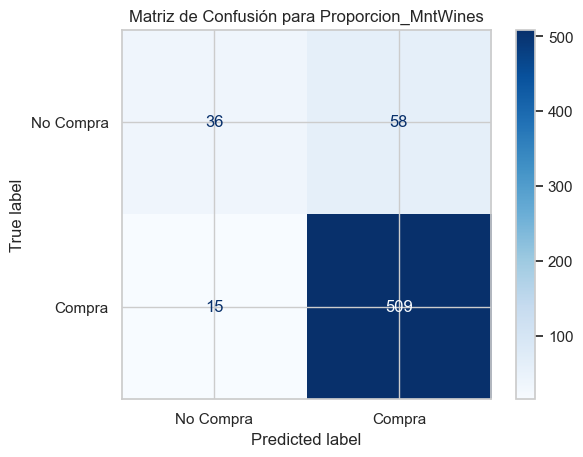

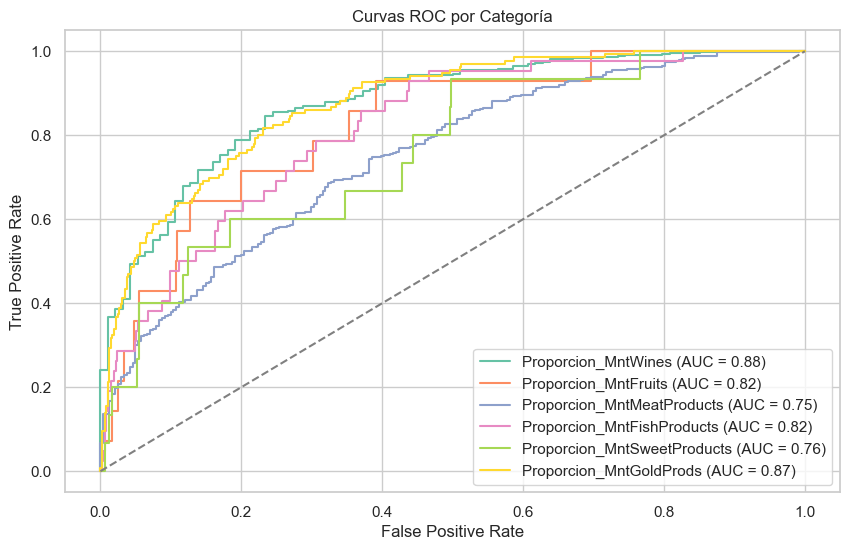

In [145]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntWines"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo fue capaz de indentificar correctamente a las personas que si compran vinos, esto puede deberse a la complejidad de los datos que si tiene valores rellenos.

**Prediccion de compra Proporcion_MntFruits**

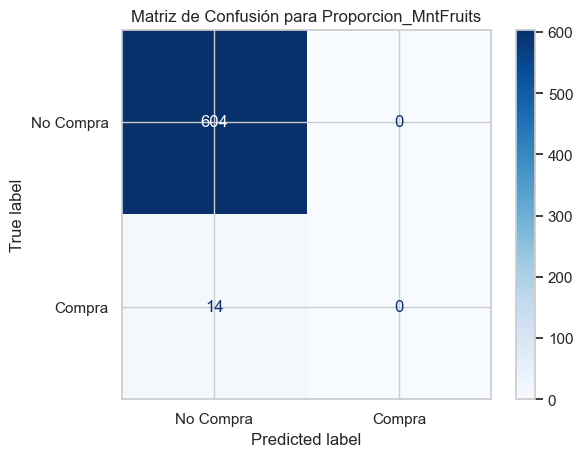

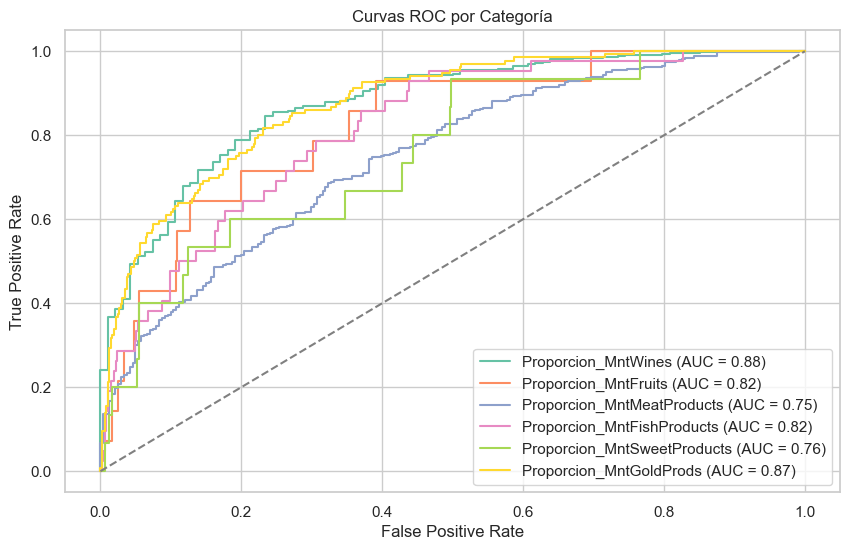

In [146]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntFruits"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo es bueno para predecir a las personas que no compran frutas, capaz hay un sobre ajuste, pero eso debe tratarse con un mejor balanceo

**Prediccion de compra Proporcion_MntMeatProducts**

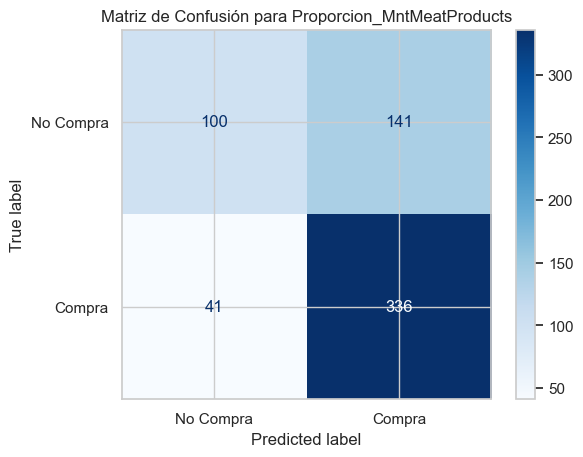

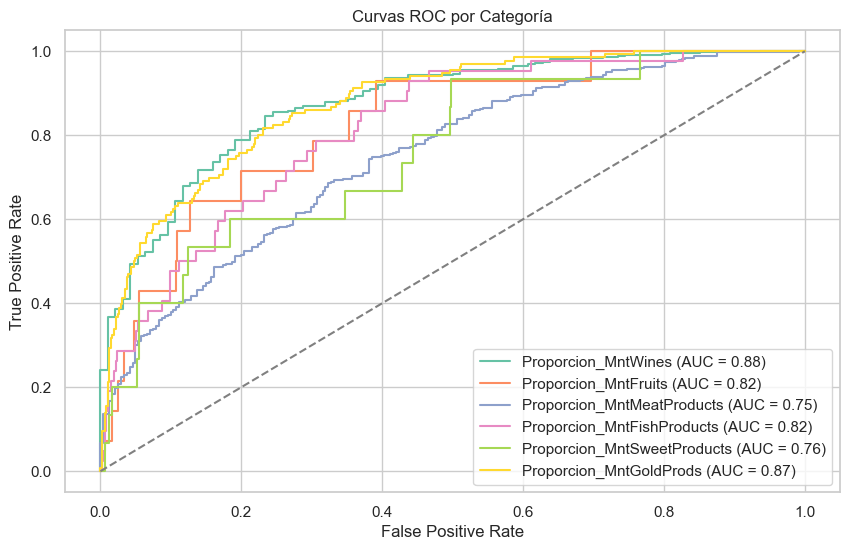

In [147]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntMeatProducts"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo es capaz de predecir con altas probabilidades para aquellas personas que si compran carne, aun asi, hay problemas para saber quienes no compran.

**Prediccion de compra Proporcion_MntFishProducts**

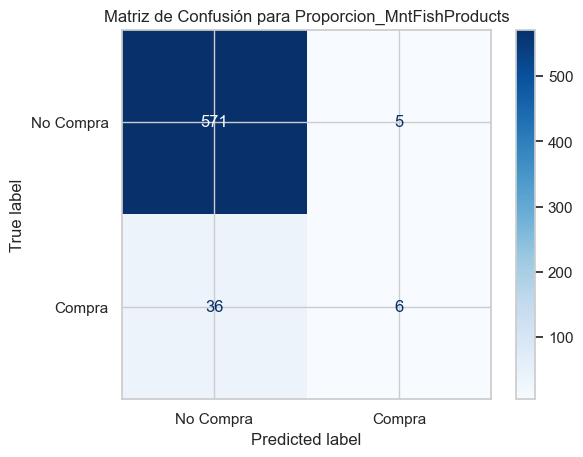

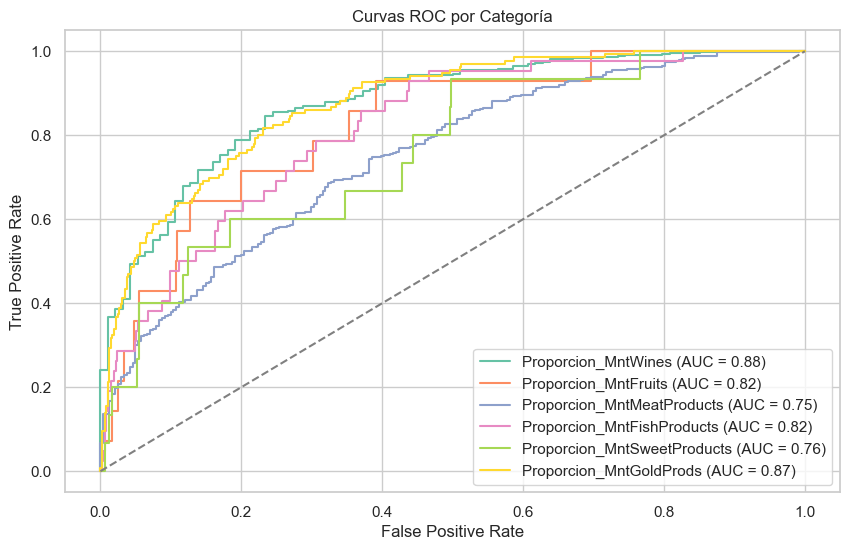

In [148]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntFishProducts"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo es capaz de predecir personas que no comprar productos del mar, aun asi, no pudo identificar las personas que si compraron, tal vez porque son pocas.

**Prediccion de compra Proporcion_MntSweetProducts**

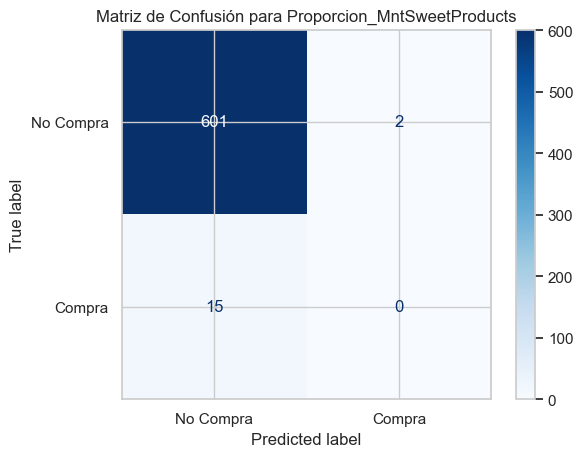

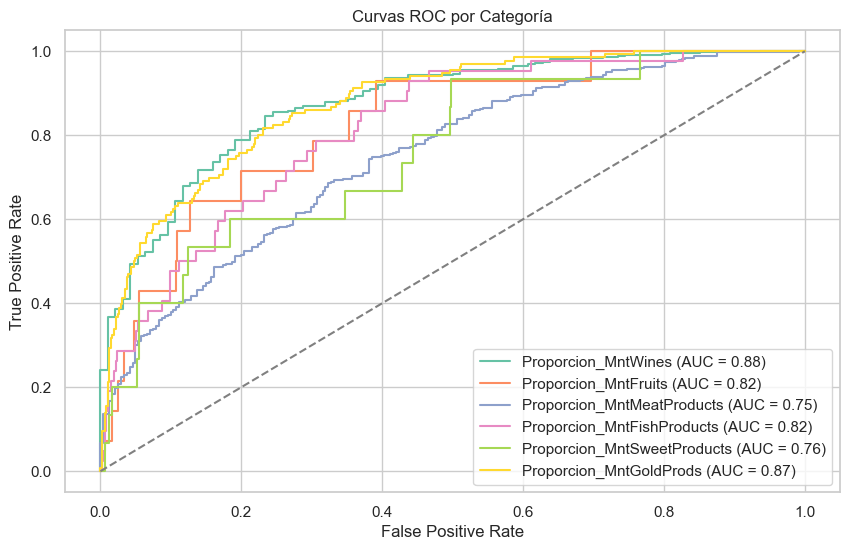

In [149]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntSweetProducts"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo es excelente para poder predecir probabilidades de no comprar dulces.

**Prediccion de compra Proporcion_MntGoldProducts**

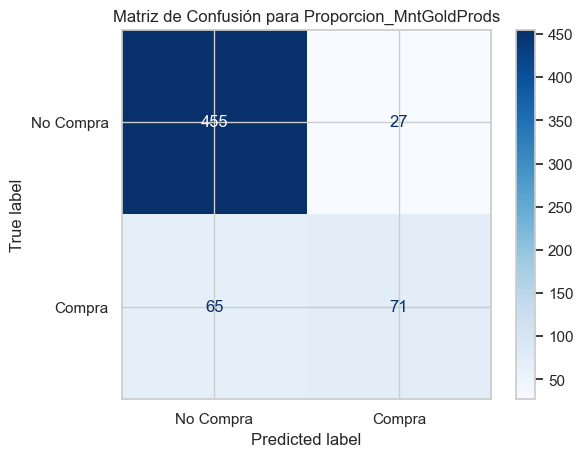

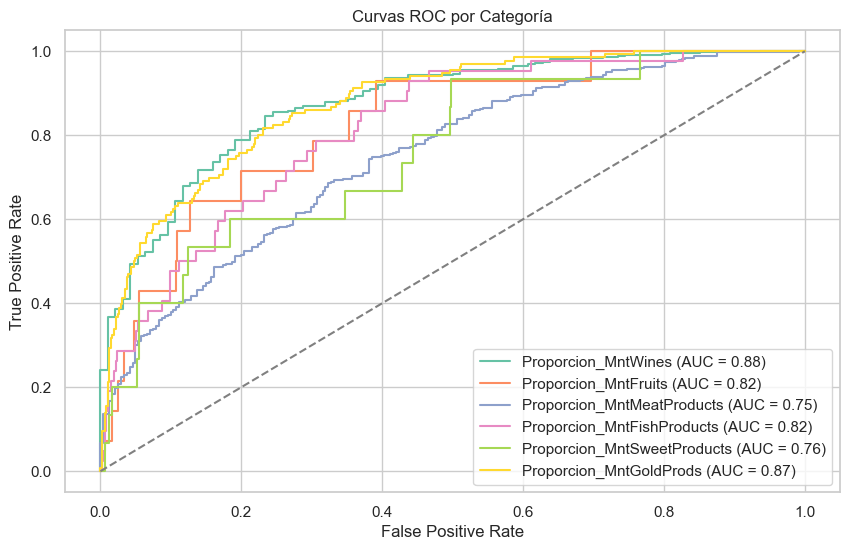

In [150]:
# Convertir proporciones predichas en clases binarias
threshold = 0.2  # Umbral del 20%
y_test_binary = (y_test > threshold).astype(int)  # Clases reales
y_pred_binary = (y_pred > threshold).astype(int)  # Clases predichas

# Crear matriz de confusión para una categoría (ejemplo: 'Proporcion_MntWines')
category = "Proporcion_MntGoldProds"
cm = confusion_matrix(y_test_binary[category], y_pred_binary[:, y.columns.get_loc(category)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión para {category}")
plt.show()

# Calcular y graficar la curva ROC para cada categoría
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test_binary[col], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Personalizar la curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Categoría")
plt.legend(loc="lower right")
plt.show()


El modelo de RFG tiene alto nivel para predecir personas que no van a comprar oro, aun asi, es malo para predecir personas que si compran oro.

In [151]:
# Paso 3: Definir variables predictoras y objetivo
X = data[['Income', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency', 'Age']]

# Predecir si realizan compras en 'Proporcion_MntWines'
y = (data["Proporcion_MntWines"] > 0.5).astype(int)  # 1 si la proporción es mayor al 10%

### **Conclusiones y Recomendaciones.**

El proyecto aborto probabilidades de compra en distintas categorias, los resultados fueron aceptables, pero hay muchos falsos positivos a la hora de predecir.

Se realizo un modelo de MLP con capas muy simples y parametros especificos porque el modelo siempre se sobreajusta. Aun asi, en las epocas mayores a 6 ya podemos notar que el modelo tuvo overfiting. Se puede solucionar pero requiere mas tiempo de analisis.

Cabe aclarar que los datos no estan preparados para ese tipo de analis, sin embargo se opto por hacer alguns calculos para adaptar los modelos a lo que pide la prueba.

**Recomendaciones,**

Se podria probar con mas feactures engineering, tambien se puede optar por otros tipos de modelos como XgBoost Clasifier para predecir categorias, o regreseros en caso de agrupar por nivel de ingresos.